<a href="https://colab.research.google.com/github/chamaldev/SML-project/blob/main/SML_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

In [ ]:
url = 'D:\master program\Sem1\machine learning\group project\\training_data.csv'
df = pd.read_csv(url)
df


,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,high_bike_demand


In [ ]:
df.shape


(1600, 16)

In [ ]:
df.describe()


,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.0,0.042713,13.082500,64.322375,15.344125
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.0,0.421198,7.756652,32.748869,2.323737
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000
25%,5.00000,1.000000,3.000000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.0,0.000000,7.500000,28.800000,16.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.0,0.000000,12.300000,79.300000,16.000000
75%,17.00000,5.000000,9.000000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.0,0.000000,17.600000,92.800000,16.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.800000,100.000000,16.000000


In [ ]:
df.columns


Index(['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday',
       'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth',
       'windspeed', 'cloudcover', 'visibility', 'increase_stock'],
      dtype='object')

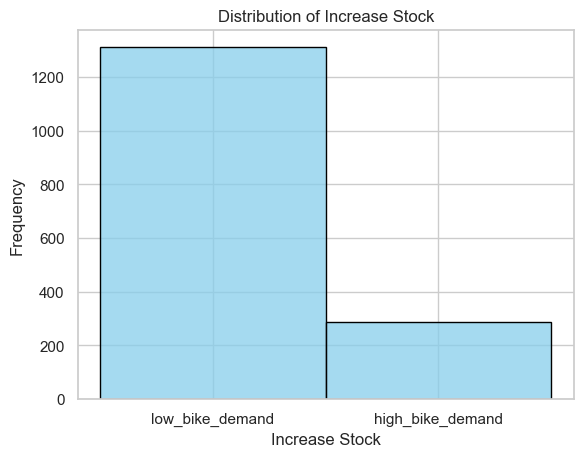

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
increase_stock_categories = df['increase_stock']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for the "increase_stock" column
sns.histplot(data=df, x='increase_stock', color='skyblue', edgecolor='black', discrete=True)

# Adding labels and title
plt.xlabel('Increase Stock')
plt.ylabel('Frequency')
plt.title('Distribution of Increase Stock')

# Display the plot
plt.show()


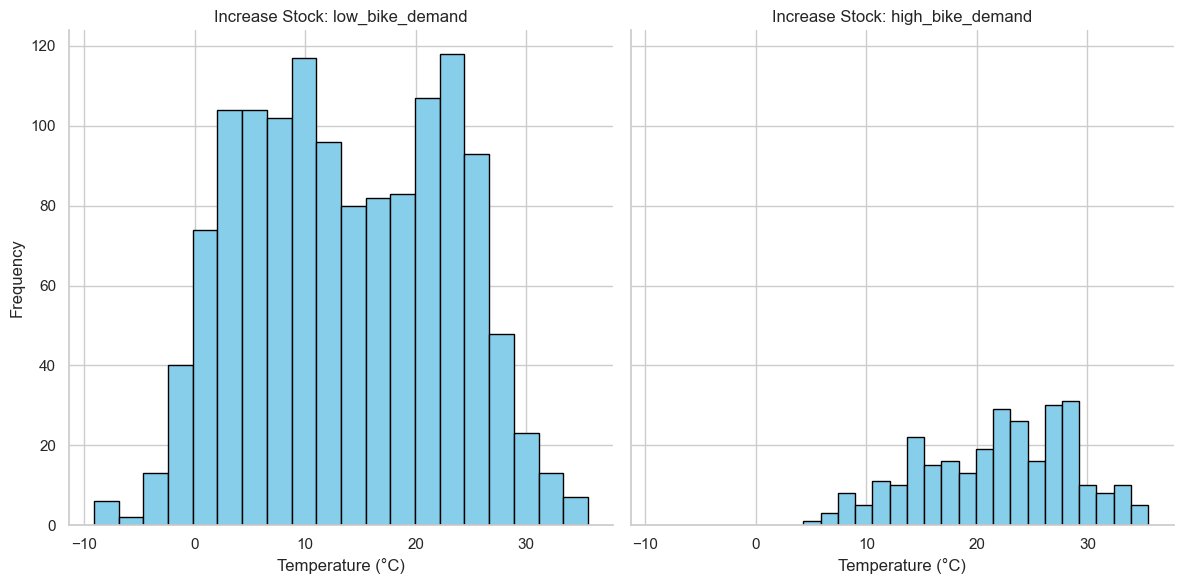

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas DataFrame named 'df'
temperature_data = df['temp']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Temperature': temperature_data, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create separate histograms for each category
g = sns.FacetGrid(plot_data, col="Increase Stock", height=6, aspect=1)
g.map(plt.hist, 'Temperature', bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
g.set_axis_labels('Temperature (°C)', 'Frequency')
g.set_titles('Increase Stock: {col_name}')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


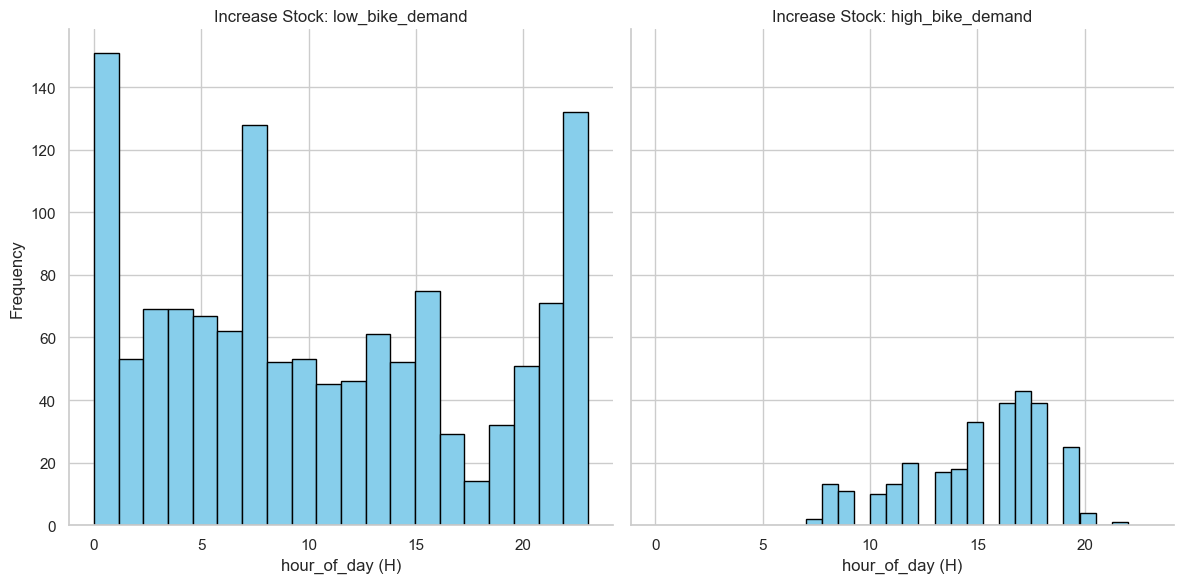

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas DataFrame named 'df'
Hrs_of_day = df['hour_of_day']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'hour_of_day': Hrs_of_day, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create separate histograms for each category
g = sns.FacetGrid(plot_data, col="Increase Stock", height=6, aspect=1)
g.map(plt.hist, 'hour_of_day', bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
g.set_axis_labels('hour_of_day (H)', 'Frequency')
g.set_titles('Increase Stock: {col_name}')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


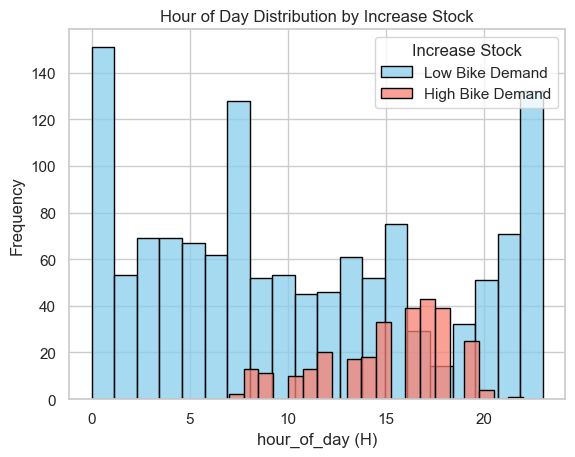

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
Hrs_of_day = df['hour_of_day']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'hour_of_day': Hrs_of_day, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='hour_of_day', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='hour_of_day', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('hour_of_day (H)')
plt.ylabel('Frequency')
plt.title('Hour of Day Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


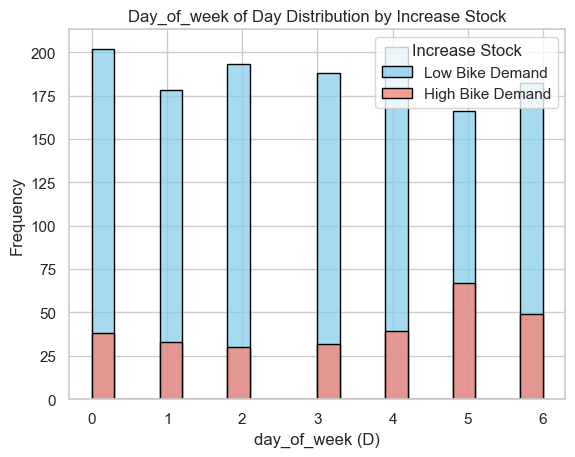

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
Days_of_week = df['day_of_week']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'day_of_week': Days_of_week, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='day_of_week', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='day_of_week', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('day_of_week (D)')
plt.ylabel('Frequency')
plt.title('Day_of_week of Day Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()

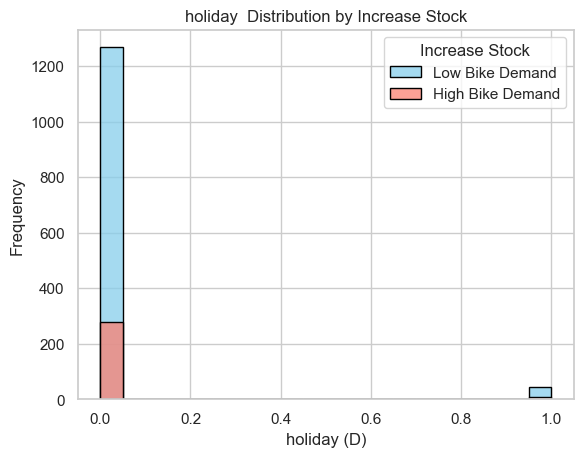

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
Holiday = df['holiday']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'holiday': Holiday, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='holiday', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='holiday', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('holiday (D)')
plt.ylabel('Frequency')
plt.title('holiday  Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()

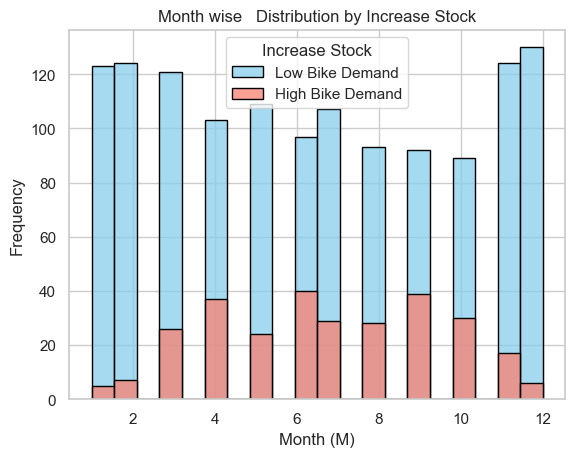

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
Month = df['month']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'month': Month, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='month', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='month', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Month (M)')
plt.ylabel('Frequency')
plt.title('Month wise   Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()